# `It-Follows`
## Followup Observations of exoplanets (and beyond)
### 1. Exploratory analysis of the ExoFOP metadata

Michael Gully-Santiago  
Wednesday, July 5, 2017  

In this exploratory notebook, we will simply fetch metadata from the ExoFOP, read it in, and see what we find out.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

You can download a CSV of all the K2 ExoFOP metadata here:  
https://exofop.ipac.caltech.edu/k2/targets.php?sort=target&ipp1=1000&page1=1&camp=All

Navigate to:  
> `Download as:` Text **CSV**   

Select the CSV link.  You will automatically download a file, which you can save to the `data/` directory in this repo to replicate the work here.

In [3]:
! ls ../data/

exofop_spectroscopy.csv exofop_targets.csv


In [4]:
! head -n 15 ../data/exofop_targets.csv

\\ K2 Targets
\\ EPIC ID = K2 Ecliptic Plane Input Catalog ID
\\ RA, Dec = Coordinates (J2000)
\\ Mag_Kep = Kepler magnitude
\\ Mag_Ks = Ks magnitude
\\ Num_plan = Number of confirmed planets
\\ Poss_pc = Possible planetary candidate
\\ Num_spec = Number of spectroscopy observations
\\ Num_img = Number of imaging observations
\\ Last Mod = Last modified date

EPIC ID,RA,Dec,Mag_Kep,Mag_Ks,Num_plan,Poss_pc,Num_spec,Num_img,Last Mod
60017809,23:29:33.14,-03:46:07.83,,,0,,0,0,2017-04-10 14:18:33
60017810,00:04:37.82,03:33:01.19,,,0,,0,0,2017-04-10 14:18:33
60017812,00:16:41.03,-00:09:25.09,,,0,,0,0,2017-04-10 14:18:33


In [5]:
efop_all = pd.read_csv('../data/exofop_targets.csv', true_values='Y', false_values='N', dtype={'Poss_pc':bool},
                       comment='\\', parse_dates=['Last Mod'])

In [6]:
efop_all.head()

,EPIC ID,RA,Dec,Mag_Kep,Mag_Ks,Num_plan,Poss_pc,Num_spec,Num_img,Last Mod
0,60017809,23:29:33.14,-03:46:07.83,NaN,NaN,0,NaN,0,0,2017-04-10 14:18:33
1,60017810,00:04:37.82,03:33:01.19,NaN,NaN,0,NaN,0,0,2017-04-10 14:18:33
2,60017812,00:16:41.03,-00:09:25.09,NaN,NaN,0,NaN,0,0,2017-04-10 14:18:33
3,60017815,23:42:06.91,-03:05:58.56,NaN,NaN,0,NaN,0,0,2017-04-10 14:18:33
4,60017818,23:31:01.62,-04:06:19.39,NaN,NaN,0,NaN,0,0,2017-04-10 14:18:33


From the [ExoFOP Help Page](https://exofop.ipac.caltech.edu/k2/help.php):
> Description of column headers:  
- EPIC ID: Identification number from the Ecliptic Plane Input Catalog (EPIC).  
- RA: Right Ascension
- Dec: Declination
- Kep mag: Kepler magnitude in EPIC.  
- Ks mag: 2MASS K_short magnitude.  
- Num Confirmed Planets: number of confirmed planets (if any).  
- Possible PC? Indicates if a target has a possible planetary candidate (PC)  
- Number of spectroscopy observations
- Number of imaging observations 
- Last Modified: date of last modification of any parameters or observing notes of the target along with user name.  

In [7]:
efop_all.shape

(287309, 10)

There are 287,309 targets and 10 columns.

In [8]:
efop_all.count()

EPIC ID     287309
RA          287309
Dec         287309
Mag_Kep     285647
Mag_Ks      270120
Num_plan    287309
Poss_pc        393
Num_spec    287309
Num_img     287309
Last Mod    287309
dtype: int64

What is the typical number of spectroscopic/imaging observations?

In [9]:
efop_all.Num_spec.describe()[['min', 'max']]

min     0.0
max    25.0
Name: Num_spec, dtype: float64

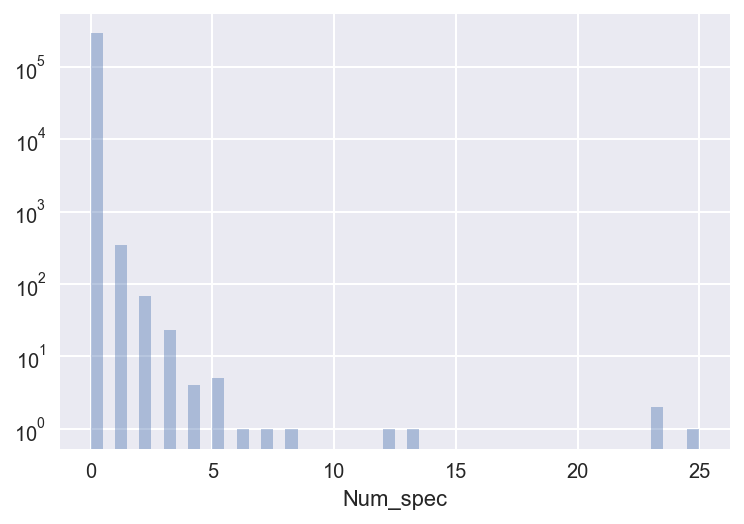

In [10]:
sns.distplot(efop_all.Num_spec, kde=False)
plt.yscale('log')

The vast majority of EPIC targets have no spectroscopic observations available on ExoFOP.

In [11]:
(efop_all.Num_spec > 0).sum(), (efop_all.Num_spec > 1).sum(), efop_all.Num_spec.sum()

(451, 108, 706)

Only 451 targets have spectra, with 108 possessing multi-epoch spectra.  A total of 706 spectroscopic observations are available for K2 ExoFOP, which is identical to the number on the homepage accessed on 5 July, 2017.

## Spectroscopy

We can examine the metadata on the spectroscopic observations by navigating to the [Spectroscopy Portal](https://exofop.ipac.caltech.edu/k2/view_spect.php?sort=id&ipp1=500&page1=1)

In [12]:
! ls ../data/

exofop_spectroscopy.csv exofop_targets.csv


In [13]:
! head -n 3 ../data/exofop_spectroscopy.csv

Unique ID,EPIC ID,Telescope,Instrument,Spectral resolution,Wavelength coverage,SNR/resolution,SNR wavelength,Flux calib,Wave calib,RV type,Obs date,User,Notes
614,201091593,Tillinghast,TRES,44000,3850 to 9096 Angstroms,15.0,5110 Angstroms,No,Yes,Abs,2016-12-2611:44:33.79,bieryla,
670,201110617,Tillinghast,TRES,44000,3850 to 9096 Angstroms,22.6,5110 Angstroms,No,Yes,Abs,2017-01-1813:00:50.40,bieryla,


In [14]:
efop_spec = pd.read_csv('../data/exofop_spectroscopy.csv', false_values='No', true_values='Yes',
                        parse_dates=['Obs date'])

In [15]:
efop_spec.head()

,Unique ID,EPIC ID,Telescope,Instrument,Spectral resolution,Wavelength coverage,SNR/resolution,SNR wavelength,Flux calib,Wave calib,RV type,Obs date,User,Notes
0,614,201091593,Tillinghast,TRES,44000,3850 to 9096 Angstroms,15.0,5110 Angstroms,No,Yes,Abs,2016-12-2611:44:33.79,bieryla,NaN
1,670,201110617,Tillinghast,TRES,44000,3850 to 9096 Angstroms,22.6,5110 Angstroms,No,Yes,Abs,2017-01-1813:00:50.40,bieryla,NaN
2,680,201110617,Tillinghast,TRES,44000,3850 to 9096 Angstroms,26.0,5110 Angstroms,No,Yes,Abs,2017-02-0110:36:10.65,bieryla,NaN
3,615,201111557,Tillinghast,TRES,44000,3850 to 9096 Angstroms,24.1,5110 Angstroms,No,Yes,Abs,2016-12-2612:01:15.16,bieryla,NaN
4,616,201127519,Tillinghast,TRES,44000,3850 to 9096 Angstroms,18.4,5110 Angstroms,No,Yes,Abs,2016-12-2612:17:12.48,bieryla,NaN


Some boiler plate columns are the same for all instruments, and are therefore not very informative.

In [16]:
boiler_plate = ('SNR wavelength', 'Flux calib', 'Wave calib', 'RV type', 'Notes')
for key in boiler_plate:
    print("{:.<20}  ".format(key), efop_spec[key].unique())

SNR wavelength......   ['5110 Angstroms' nan]
Flux calib..........   ['No' nan]
Wave calib..........   ['Yes' nan]
RV type.............   ['Abs' nan]
Notes...............   [ nan]


In [17]:
efop_spec.Telescope.unique(), efop_spec.Instrument.unique(), efop_spec['Spectral resolution'].unique()

(array(['Tillinghast', 'IRTF', 'NTT', 'Hale', 'Keck II'], dtype=object),
 array(['TRES', 'SpeX', 'SOFI', 'TripleSpec', 'ESI'], dtype=object),
 array([44000,  2000,  1000,  2600,  4000]))

In [18]:
efop_spec.groupby('Instrument').count()['Unique ID']

Instrument
ESI             1
SOFI           15
SpeX          121
TRES          530
TripleSpec     39
Name: Unique ID, dtype: int64

There are 5 unique telescopes and 5 unique instruments populated in the K2 ExoFOP.  Who is uploading this data?

In [19]:
efop_spec.groupby('User').count()['Unique ID']

User
bieryla      530
dressing     160
martinez      15
schlecker      1
Name: Unique ID, dtype: int64

Only 4 people have uploaded spectroscopy to the K2 ExoFOP.

In [23]:
vec = efop_spec['SNR/resolution']

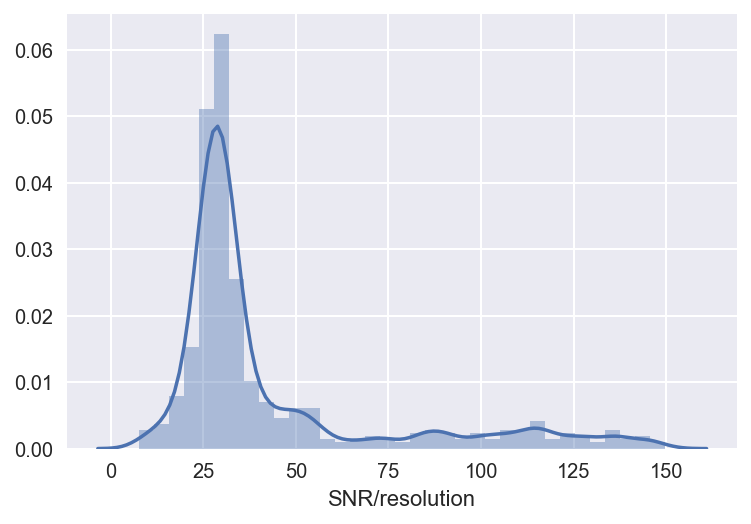

In [24]:
sns.distplot(vec[vec.notnull()]);

I assume this label refers to SNR per resolution element (e.g., not "per pixel").  

## The end for now!